# Major Leagues
- EECS 731 Project 2
- Author: Lazarus
- ID : 3028051
 
 
## Problem Statement
### NFL, MLB, NBA and Soccer scores
1. Set up a data science project structure in a new git repository in your GitHub account
2. Pick one of the game data sets depending your sports preference
https://github.com/fivethirtyeight/nfl-elo-game
https://github.com/fivethirtyeight/data/tree/master/mlb-elo
https://github.com/fivethirtyeight/data/tree/master/nba-carmelo
https://github.com/fivethirtyeight/data/tree/master/soccer-spi
3. Load the data set into panda data frames
4. Formulate one or two ideas on how feature engineering would help the data set to establish additional value using exploratory data analysis
5. Build one or more regression models to determine the scores for each team using the other columns as features
6. Document your process and results
7. Commit your notebook, source code, visualizations and other supporting files to the git repository in GitHub

# Data Description
## We are using Major League Baseball dataset from:
- https://github.com/fivethirtyeight/data/tree/master/mlb-elo

Column | Description
-----| ---------
date | Date of game
season | Year of season
neutral | Whether game was on a neutral site
playoff | Whether game was in playoffs, and the playoff round if so
team1 | Abbreviation for home team
team2 | Abbreviation for away team
elo1_pre | Home team's Elo rating before the game
elo2_pre | Away team's Elo rating before the game
elo_prob1 | Home team's probability of winning according to Elo ratings
elo_prob2 | Away team's probability of winning according to Elo ratings
elo1_post | Home team's Elo rating after the game
elo2_post | Away team's Elo rating after the game
rating1_pre | Home team's rating before the game
rating2_pre | Away team's rating before the game
pitcher1 | Name of home starting pitcher
pitcher2 | Name of away starting pitcher
pitcher1_rgs | Home starting pitcher's rolling game score before the game
pitcher2_rgs | Away starting pitcher's rolling game score before the game
pitcher1_adj | Home starting pitcher's adjustment to their team's rating
pitcher2_adj | Away starting pitcher's adjustment to their team's rating
rating_prob1 | Home team's probability of winning according to team ratings and starting pitchers
rating_prob2 | Away team's probability of winning according to team ratings and starting pitchers
rating1_post | Home team's rating after the game
rating2_post | Away team's rating after the game
score1 | Home team's score
score2 | Away team's score

## What we want to do?
- Build one or more regression models to determine the scores for each team using the other columns as features


## Step 1: Prepare Environment and import Data
- Let's import pandas, numpy and pyplot libraries

In [280]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

- Let's import data and display top three samples

In [221]:
mlbdata= pd.read_csv("../data/mlb_elo.csv")
mlbdata.head(3)

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,pitcher1_rgs,pitcher2_rgs,pitcher1_adj,pitcher2_adj,rating_prob1,rating_prob2,rating1_post,rating2_post,score1,score2
0,2020-10-10,2020,1,d,LAD,SDP,1598.290926,1525.832831,0.635558,0.364442,...,NaN,NaN,NaN,NaN,0.620261,0.379739,NaN,NaN,NaN,NaN
1,2020-10-10,2020,1,d,ATL,FLA,1543.508397,1482.006574,0.615867,0.384133,...,NaN,NaN,NaN,NaN,0.608742,0.391258,NaN,NaN,NaN,NaN
2,2020-10-09,2020,1,d,SDP,LAD,1525.832831,1598.290926,0.364442,0.635558,...,NaN,NaN,NaN,NaN,0.379739,0.620261,NaN,NaN,NaN,NaN


## Step 2: Data Analysis and Feature Engineering
- Lets check how many samples we have

In [222]:
mlbdata.shape
# mlbdata.dropna().pitcher1.values[:20]

(220946, 26)

- We have almost 220 thousand samples and 26 features
- Let's check for missing data

In [223]:
print("::::::::before:::::::::::")
print(mlbdata.isnull().sum())

::::::::before:::::::::::
date                 0
season               0
neutral              0
playoff         219291
team1                0
team2                0
elo1_pre             0
elo2_pre             0
elo_prob1            0
elo_prob2            0
elo1_post           20
elo2_post           20
rating1_pre          0
rating2_pre          0
pitcher1            50
pitcher2            53
pitcher1_rgs     33753
pitcher2_rgs     33756
pitcher1_adj     34434
pitcher2_adj     34436
rating_prob1         0
rating_prob2         0
rating1_post        20
rating2_post        20
score1              20
score2              20
dtype: int64


- That is too much of missing values under `playoff` feature, so let's drop that
- Also we would not need `date` so let's deop that too.
- `pitcher1` and `pitcher2` are names of pitchers in that particular game from both teams as we have their rgs(rolling game score) we can drop these features too
- Let's do all of that now

In [224]:
mlbdata.drop(labels=['date','playoff','pitcher1','pitcher2'], axis=1, inplace=True)

- Now, we can drop all the samples with incomplete data

In [225]:
mlbdata= mlbdata.dropna()
print("::::::::after::::::::::::")
print(mlbdata.isnull().sum())

::::::::after::::::::::::
season          0
neutral         0
team1           0
team2           0
elo1_pre        0
elo2_pre        0
elo_prob1       0
elo_prob2       0
elo1_post       0
elo2_post       0
rating1_pre     0
rating2_pre     0
pitcher1_rgs    0
pitcher2_rgs    0
pitcher1_adj    0
pitcher2_adj    0
rating_prob1    0
rating_prob2    0
rating1_post    0
rating2_post    0
score1          0
score2          0
dtype: int64


- Let's look at few samples, size and column descriptions to find out what else we can do

In [226]:
mlbdata.head()

,season,neutral,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,...,pitcher1_rgs,pitcher2_rgs,pitcher1_adj,pitcher2_adj,rating_prob1,rating_prob2,rating1_post,rating2_post,score1,score2
20,2020,0,SDP,STL,1522.312734,1520.100045,0.550128,0.449872,1525.832831,1516.579948,...,47.400000,57.310588,-17.746023,29.444071,0.461857,0.538143,1534.038131,1509.745224,4.0,0.0
21,2020,0,CHC,FLA,1517.011886,1478.403936,0.617874,0.382126,1513.409248,1482.006574,...,60.622663,50.317526,40.641459,5.064633,0.673112,0.326888,1517.959644,1475.108982,0.0,2.0
22,2020,0,LAD,MIL,1596.678175,1502.693145,0.712092,0.287908,1598.290926,1501.080394,...,56.674581,57.809816,21.716845,33.175306,0.673916,0.326084,1606.065971,1506.703444,3.0,0.0
23,2020,0,SDP,STL,1519.722828,1522.689951,0.540271,0.459729,1522.312734,1520.100045,...,52.966274,52.749116,7.282398,7.517466,0.544395,0.455605,1530.728125,1513.055229,11.0,9.0
24,2020,0,OAK,CHW,1545.674260,1507.785767,0.616569,0.383431,1547.618027,1505.842000,...,50.478180,49.661565,-1.921507,-6.888932,0.558056,0.441944,1532.981409,1513.624593,6.0,4.0


In [227]:
mlbdata.shape

(186502, 22)

In [228]:
mlbdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186502 entries, 20 to 186530
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   season        186502 non-null  int64  
 1   neutral       186502 non-null  int64  
 2   team1         186502 non-null  object 
 3   team2         186502 non-null  object 
 4   elo1_pre      186502 non-null  float64
 5   elo2_pre      186502 non-null  float64
 6   elo_prob1     186502 non-null  float64
 7   elo_prob2     186502 non-null  float64
 8   elo1_post     186502 non-null  float64
 9   elo2_post     186502 non-null  float64
 10  rating1_pre   186502 non-null  float64
 11  rating2_pre   186502 non-null  float64
 12  pitcher1_rgs  186502 non-null  float64
 13  pitcher2_rgs  186502 non-null  float64
 14  pitcher1_adj  186502 non-null  float64
 15  pitcher2_adj  186502 non-null  float64
 16  rating_prob1  186502 non-null  float64
 17  rating_prob2  186502 non-null  float64
 18  rat

- Ok now, let us check all the available teams

In [229]:
print(sorted(set(mlbdata.team1.values)))

['ANA', 'ARI', 'ATL', 'BAL', 'BOS', 'CHC', 'CHW', 'CIN', 'CLE', 'COL', 'DET', 'FLA', 'HOU', 'KCR', 'LAD', 'MIL', 'MIN', 'NYM', 'NYY', 'OAK', 'PHI', 'PIT', 'SDP', 'SEA', 'SFG', 'STL', 'TBD', 'TEX', 'TOR', 'WSN']


In [230]:
print(sorted(set(mlbdata.team2.values)))

['ANA', 'ARI', 'ATL', 'BAL', 'BOS', 'CHC', 'CHW', 'CIN', 'CLE', 'COL', 'DET', 'FLA', 'HOU', 'KCR', 'LAD', 'MIL', 'MIN', 'NYM', 'NYY', 'OAK', 'PHI', 'PIT', 'SDP', 'SEA', 'SFG', 'STL', 'TBD', 'TEX', 'TOR', 'WSN']


- There is something interesting here, if we look carefully `TBD` is also termed as team, where as TBD stands for 'To be declared'. This might be some faulty samples as TBD could potentially be any possible team and might affect our prediction model so better to drop all those samples.

In [231]:
print("#############before#########")
print("samples with 'tbd' as value in team1: "+str(mlbdata.team1.values.tolist().count('TBD')))
print("samples with 'tbd' as value in team2: "+str(mlbdata.team2.values.tolist().count('TBD')))
mlbdata= mlbdata[mlbdata.team1 != 'TBD']
mlbdata= mlbdata[mlbdata.team2 != 'TBD']
print("#############after##########")
print("samples with 'tbd' as value in team1: "+str(mlbdata.team1.values.tolist().count('TBD')))
print("samples with 'tbd' as value in team2: "+str(mlbdata.team2.values.tolist().count('TBD')))

#############before#########
samples with 'tbd' as value in team1: 1829
samples with 'tbd' as value in team2: 1831
#############after##########
samples with 'tbd' as value in team1: 0
samples with 'tbd' as value in team2: 0


- From column description we understood that except for `team1` ,`team2` and `season` rest all numericals.
- Let's now encode these three features using `LabelEncoder`.

In [232]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(sorted(set(mlbdata.team2.values)))
mlbdata['team1']= le.transform(mlbdata['team1'])
mlbdata['team2']= le.transform(mlbdata['team2'])
mlbdata.head(5)

,season,neutral,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,...,pitcher1_rgs,pitcher2_rgs,pitcher1_adj,pitcher2_adj,rating_prob1,rating_prob2,rating1_post,rating2_post,score1,score2
20,2020,0,22,25,1522.312734,1520.100045,0.550128,0.449872,1525.832831,1516.579948,...,47.400000,57.310588,-17.746023,29.444071,0.461857,0.538143,1534.038131,1509.745224,4.0,0.0
21,2020,0,5,11,1517.011886,1478.403936,0.617874,0.382126,1513.409248,1482.006574,...,60.622663,50.317526,40.641459,5.064633,0.673112,0.326888,1517.959644,1475.108982,0.0,2.0
22,2020,0,14,15,1596.678175,1502.693145,0.712092,0.287908,1598.290926,1501.080394,...,56.674581,57.809816,21.716845,33.175306,0.673916,0.326084,1606.065971,1506.703444,3.0,0.0
23,2020,0,22,25,1519.722828,1522.689951,0.540271,0.459729,1522.312734,1520.100045,...,52.966274,52.749116,7.282398,7.517466,0.544395,0.455605,1530.728125,1513.055229,11.0,9.0
24,2020,0,19,6,1545.674260,1507.785767,0.616569,0.383431,1547.618027,1505.842000,...,50.478180,49.661565,-1.921507,-6.888932,0.558056,0.441944,1532.981409,1513.624593,6.0,4.0


In [233]:
mlbdata['season']= le.fit_transform(mlbdata['season'])
mlbdata.head(1)

,season,neutral,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,...,pitcher1_rgs,pitcher2_rgs,pitcher1_adj,pitcher2_adj,rating_prob1,rating_prob2,rating1_post,rating2_post,score1,score2
20,107,0,22,25,1522.312734,1520.100045,0.550128,0.449872,1525.832831,1516.579948,...,47.4,57.310588,-17.746023,29.444071,0.461857,0.538143,1534.038131,1509.745224,4.0,0.0


- Let's confirm if we have all features as numerical values

In [234]:
mlbdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182842 entries, 20 to 186530
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   season        182842 non-null  int64  
 1   neutral       182842 non-null  int64  
 2   team1         182842 non-null  int32  
 3   team2         182842 non-null  int32  
 4   elo1_pre      182842 non-null  float64
 5   elo2_pre      182842 non-null  float64
 6   elo_prob1     182842 non-null  float64
 7   elo_prob2     182842 non-null  float64
 8   elo1_post     182842 non-null  float64
 9   elo2_post     182842 non-null  float64
 10  rating1_pre   182842 non-null  float64
 11  rating2_pre   182842 non-null  float64
 12  pitcher1_rgs  182842 non-null  float64
 13  pitcher2_rgs  182842 non-null  float64
 14  pitcher1_adj  182842 non-null  float64
 15  pitcher2_adj  182842 non-null  float64
 16  rating_prob1  182842 non-null  float64
 17  rating_prob2  182842 non-null  float64
 18  rat

### Let's prepare transformed data to train regression models
- Let's make labels with features - `score1` and `score2`

In [235]:
Y = np.array ([mlbdata['score1'],mlbdata ['score2']]).T

In [236]:
Y.shape

(182842, 2)

- Let's use all other features for Training regression models

In [237]:
X= mlbdata.drop(['score1','score2'], axis= 1)

In [238]:
X.shape

(182842, 20)

# Step3: Score Predictor- Regression Models
- Let's split data samples into training and validation parts to evaluate our models.
- Lets use 20% of data for validation and rest all for training

In [240]:
from sklearn.model_selection import train_test_split
xtr, xval, ytr, yval = train_test_split(X,Y, test_size=0.20, random_state=5)

In [265]:
xtr.shape, ytr.shape, xval.shape, yval.shape

((146273, 20), (146273, 2), (36569, 20), (36569, 2))

## Evaluation Metrics
- In statistics, the mean squared error (MSE) or mean squared deviation (MSD) of an estimator (of a procedure for estimating an unobserved quantity) measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value.

- In statistics, mean absolute error (MAE) is a measure of errors between paired observations expressing the same phenomenon. Examples of Y versus X include comparisons of predicted versus observed, subsequent time versus initial time, and one technique of measurement versus an alternative technique of measurement.

- The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

In [262]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

## Linear Regression

In [263]:
#Linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
#training process
lr.fit (xtr, ytr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Evaluating Linear Regression Model

In [264]:
lr_mae=mean_absolute_error(lr.predict(xval), yval)
lr_mse=mean_squared_error(lr.predict(xval), yval)
lr_r2score=lr.score(xval,yval)

print('Mean Absolute Error of Linear Regression Model is:',lr_mae)
print('Mean Squared Error of Linear Regression Model is:',lr_mse)
print("R2 Score of Linear Regression is:", lr_r2score)

Mean Absolute Error of Linear Regression Model is: 1.8633569811879984
Mean Squared Error of Linear Regression Model is: 5.665470038987818
R2 Score of Linear Regression is: 0.4240506279421571


## Random Forest Regressor

In [266]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
rf= MultiOutputRegressor(RandomForestRegressor(n_estimators=10,random_state=5))
rf.fit(xtr, ytr)

MultiOutputRegressor(estimator=RandomForestRegressor(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     criterion='mse',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_estimators=10,
                                               

## Evaluating Random Forest Regressor model

In [267]:
rf_mae=mean_absolute_error(rf.predict(xval), yval)
rf_mse=mean_squared_error(rf.predict(xval), yval)
rf_r2score=rf.score(xval,yval)

print('Mean Absolute Error of Random Forest Regression Model is:',rf_mae)
print('Mean Squared Error of Random Forest Regression Model is:',rf_mse)
print("R2 Score of Random Forest Regression is:", rf_r2score)

Mean Absolute Error of Random Forest Regression Model is: 1.7934028822226131
Mean Squared Error of Random Forest Regression Model is: 5.182440181574579
R2 Score of Random Forest Regression is: 0.47225396605815206


## Gradient Boosting Regressor

In [268]:
from xgboost import XGBRegressor

gb = MultiOutputRegressor(XGBRegressor())
#training process
gb.fit (xtr, ytr)

MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='reg:squarederror',
                                           

## Evaluating Gradient Boosting Regressor Model

In [270]:
gb_mae=mean_absolute_error(gb.predict(xval), yval)
gb_mse=mean_squared_error(gb.predict(xval), yval)
gb_r2score=gb.score(xval,yval)

print('Mean Absolute Error of Gradient Boosting Regression Model is:',gb_mae)
print('Mean Squared Error of Gradient Boosting Regression Model is:',gb_mse)
print("R2 Score of Gradient Boosting Regression is:", gb_r2score)

Mean Absolute Error of Gradient Boosting Regression Model is: 1.7189645640945874
Mean Squared Error of Gradient Boosting Regression Model is: 4.7782405274185
R2 Score of Gradient Boosting Regression is: 0.5133224383841308


## Neural Network(Multi-layer Perceptron) regressor

In [274]:
from sklearn.neural_network import MLPRegressor

mlp= MLPRegressor(max_iter=500, random_state=5)
mlp.fit(xtr,ytr)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=500,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=5, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

## Evaluating Multi-layer Perceptron regressor model

In [275]:
mlp_mae=mean_absolute_error(mlp.predict(xval), yval)
mlp_mse=mean_squared_error(mlp.predict(xval), yval)
mlp_r2score=mlp.score(xval,yval)

print('Mean Absolute Error of Multi-layer Perceptron regressor Model is:',mlp_mae)
print('Mean Squared Error of Multi-layer Perceptron regressor Model is:',mlp_mse)
print("R2 Score of Multi-layer Perceptron regressor is:", mlp_r2score)

Mean Absolute Error of Multi-layer Perceptron regressor Model is: 3.5972380053233866
Mean Squared Error of Multi-layer Perceptron regressor Model is: 19.38537517987625
R2 Score of Multi-layer Perceptron regressor is: -0.9707093295210745


# Step 4: Visualizing Results
- Let's plot mean squared errors for every model

([<matplotlib.axis.XTick at 0x13736741b08>,
 <a list of 4 Text xticklabel objects>)

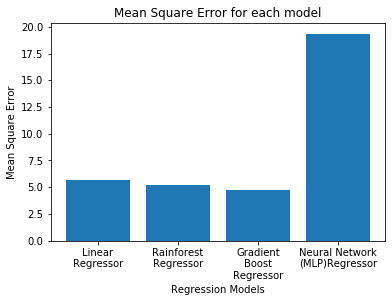

In [298]:
test_mse = (lr_mse, rf_mse ,gb_mse ,mlp_mse)
plt.bar(index, test_mse)
plt.xlabel('Regression Models')
plt.ylabel('Mean Square Error')
plt.title('Mean Square Error for each model')
plt.xticks(index, ('Linear\nRegressor', 'Rainforest\nRegressor', 'Gradient\nBoost\nRegressor', 'Neural Network\n(MLP)Regressor'))


- Let's plot mean absolute errors for every model

([<matplotlib.axis.XTick at 0x13793311848>,
 <a list of 4 Text xticklabel objects>)

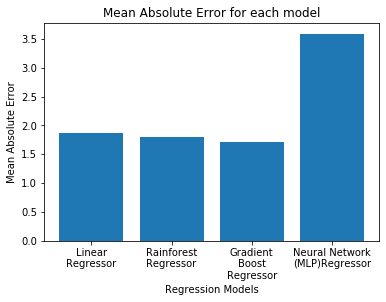

In [301]:
test_mae = (lr_mae, rf_mae ,gb_mae ,mlp_mae)
 
# create plot
plt.bar(index, test_mae)
 
plt.xlabel('Regression Models')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error for each model')
plt.xticks(index, ('Linear\nRegressor', 'Rainforest\nRegressor', 'Gradient\nBoost\nRegressor', 'Neural Network\n(MLP)Regressor'))


In [305]:
print("R2 Score of Linear Regression is:", lr_r2score)
print("R2 Score of Random Forest Regression is:", rf_r2score)
print("R2 Score of Gradient Boosting Regression is:", gb_r2score)
print("R2 Score of Multi-layer Perceptron regressor is:", mlp_r2score)

R2 Score of Linear Regression is: 0.4240506279421571
R2 Score of Random Forest Regression is: 0.47225396605815206
R2 Score of Gradient Boosting Regression is: 0.5133224383841308
R2 Score of Multi-layer Perceptron regressor is: -0.9707093295210745


## Observation:
- We can say that Gradient Boost Regressor performed better than all others
- Although Neural Network(MLP) performed the worst, by tuning parameters we can make neural network to work better than all others. This is clear indication of over-fitting as we have left all parameters to default values.

## Conclusion and Future Developments:
- We could achieve quite good performance even without understanding lot about how these features actually worked.
- If we could understand how all the features affect score in-depth then we could make our models to predict much more accurately.
- we can also work a bit on Neural Network model by tuning parameters to achieve best results.